In [ ]:
import shutil
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.random import set_seed
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# with_mask_images = os.listdir("/content/drive/MyDrive/CMPE-257-project-Data/with_mask")
# without_mask_images = os.listdir("/content/drive/MyDrive/CMPE-257-project-Data/without_mask")

In [ ]:
# os.mkdir("/content/drive/MyDrive/CMPE-257-project-Data/train")
# os.mkdir("/content/drive/MyDrive/CMPE-257-project-Data/train/with_mask")
# os.mkdir("/content/drive/MyDrive/CMPE-257-project-Data/val")
# os.mkdir("/content/drive/MyDrive/CMPE-257-project-Data/val/with_mask")
# os.mkdir("/content/drive/MyDrive/CMPE-257-project-Data/test")
# os.mkdir("/content/drive/MyDrive/CMPE-257-project-Data/test/with_mask")


# os.mkdir("/content/drive/MyDrive/CMPE-257-project-Data/train/without_mask")
# os.mkdir("/content/drive/MyDrive/CMPE-257-project-Data/val/without_mask")
# os.mkdir("/content/drive/MyDrive/CMPE-257-project-Data/test/without_mask")

# with_mask_train_len = int(np.round(0.7 * len(with_mask_images),0))
# with_mask_val_len = int(np.round(0.85 * len(with_mask_images),0))

# for i in range(with_mask_train_len):
#     shutil.copy(os.path.join("/content/drive/MyDrive/CMPE-257-project-Data/with_mask",with_mask_images[i]),"/content/drive/MyDrive/CMPE-257-project-Data/train/with_mask")
    
# for i in range(with_mask_train_len,with_mask_val_len):
#     shutil.copy(os.path.join("/content/drive/MyDrive/CMPE-257-project-Data/with_mask",with_mask_images[i]),"/content/drive/MyDrive/CMPE-257-project-Data/val/with_mask")
    
# for i in range(with_mask_val_len,len(with_mask_images)):
#     shutil.copy(os.path.join("/content/drive/MyDrive/CMPE-257-project-Data/with_mask",with_mask_images[i]),"/content/drive/MyDrive/CMPE-257-project-Data/test/with_mask")

# without_mask_train_len = int(np.round(0.7 * len(without_mask_images),0))
# without_mask_val_len = int(np.round(0.85 * len(without_mask_images),0))

# for i in range(without_mask_train_len):
#     shutil.copy(os.path.join("/content/drive/MyDrive/CMPE-257-project-Data/without_mask",without_mask_images[i]),"/content/drive/MyDrive/CMPE-257-project-Data/train/without_mask")
    
# for i in range(without_mask_train_len,without_mask_val_len):
#     shutil.copy(os.path.join("/content/drive/MyDrive/CMPE-257-project-Data/without_mask",without_mask_images[i]),"/content/drive/MyDrive/CMPE-257-project-Data/val/without_mask")
    
# for i in range(without_mask_val_len,len(without_mask_images)):
#     shutil.copy(os.path.join("/content/drive/MyDrive/CMPE-257-project-Data/without_mask",without_mask_images[i]),"/content/drive/MyDrive/CMPE-257-project-Data/test/without_mask")

In [ ]:
PATH_TRAIN_MASK = "/content/drive/MyDrive/CMPE-257-project-Data/train/with_mask"
PATH_VAL_MASK = "/content/drive/MyDrive/CMPE-257-project-Data/val/with_mask"
PATH_TEST_MASK = "/content/drive/MyDrive/CMPE-257-project-Data/test/with_mask"

PATH_TRAIN_NO_MASK = "/content/drive/MyDrive/CMPE-257-project-Data/train/without_mask"
PATH_VAL_NO_MASK = "/content/drive/MyDrive/CMPE-257-project-Data/val/without_mask"
PATH_TEST_NO_MASK = "/content/drive/MyDrive/CMPE-257-project-Data/test/without_mask"

PATH_TRAIN = "/content/drive/MyDrive/CMPE-257-project-Data/train"
PATH_VAL = "/content/drive/MyDrive/CMPE-257-project-Data/val"
PATH_TEST = "/content/drive/MyDrive/CMPE-257-project-Data/test"

## **Model Generation**

In [ ]:
print(f'With Mask Train: {len(os.listdir(PATH_TRAIN_MASK))}\n\
With Mask Validation: {len(os.listdir(PATH_VAL_MASK))}\n\
With Mask Test: {len(os.listdir(PATH_TEST_MASK))}\n\
With Mask Total: {len(os.listdir(PATH_TRAIN_MASK))+len(os.listdir(PATH_VAL_MASK))+len(os.listdir(PATH_TEST_MASK))}')

With Mask Train: 2608
With Mask Validation: 558
With Mask Test: 559
With Mask Total: 3725


In [ ]:
print(f'Without Mask Train: {len(os.listdir(PATH_TRAIN_NO_MASK))}\n\
Without Mask Validation: {len(os.listdir(PATH_VAL_NO_MASK))}\n\
Without Mask Test: {len(os.listdir(PATH_TEST_NO_MASK))}\n\
Without Mask Total: {len(os.listdir(PATH_TRAIN_NO_MASK))+len(os.listdir(PATH_VAL_NO_MASK))+len(os.listdir(PATH_TEST_NO_MASK))}')

Without Mask Train: 2687
Without Mask Validation: 575
Without Mask Test: 576
Without Mask Total: 3838


In [ ]:
train_mask_files = os.listdir(PATH_TRAIN_MASK)
train_no_mask_files = os.listdir(PATH_TRAIN_NO_MASK)

In [ ]:
rows=20 #rows in subplots
cols=5 #columns in subplots

fig,ax = plt.subplots(rows,cols,figsize=(12,100))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join(PATH_TRAIN_NO_MASK,train_no_mask_files[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

In [ ]:
rows=20 #rows in subplots
cols=5 #columns in subplots

fig,ax = plt.subplots(rows,cols,figsize=(12,100))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join(PATH_TRAIN_MASK,train_mask_files[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

**Getting height and width of images into an array**

In [ ]:
for i in range(len(train_mask_files)):
    train_image_shape = plt.imread(os.path.join(PATH_TRAIN_MASK,train_mask_files[i])).shape
    if i==0:
        width = train_image_shape[0]
        height = train_image_shape[1]
    else:
        width = np.append(width,train_image_shape[0])
        height = np.append(height,train_image_shape[1])
        
for i in range(len(train_no_mask_files)):
    train_image_shape = plt.imread(os.path.join(PATH_TRAIN_NO_MASK,train_no_mask_files[i])).shape
    width = np.append(width,train_image_shape[0])
    height = np.append(height,train_image_shape[1])

In [ ]:
sns.jointplot(width[width<400][:(min(len(width[width<400]),len(height[height<400])))],height[height<400][:(min(len(width[width<400]),len(height[height<400])))])
plt.xlabel("Width")
plt.ylabel("Height");

**explain plot**

In [ ]:
train_data_gen = ImageDataGenerator(rotation_range=30,
                                    width_shift_range=0.02,
                                    height_shift_range=0.02,
                                    zoom_range=[0.8,1.2],
                                    horizontal_flip=True,
                                    rescale=1/255
                                   )

val_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

**Trying Augmentation**

In [ ]:
fig,ax = plt.subplots(1,5,figsize=(15,15))
r = random.sample(range(len(train_mask_files)),1)[0]
ax[0].imshow(plt.imread(os.path.join(PATH_TRAIN_MASK,train_mask_files[r])))
ax[0].set_title("Original")
ax[0].axis("off")
for i in range(1,5):
    ax[i].imshow(train_data_gen.random_transform(plt.imread(os.path.join(PATH_TRAIN_MASK,train_mask_files[r]))))
    ax[i].set_title("Augmented")
    ax[i].axis("off")
plt.show()


In [ ]:
fig,ax = plt.subplots(1,5,figsize=(15,15))
r = random.sample(range(len(train_no_mask_files)),1)[0]
ax[0].imshow(plt.imread(os.path.join(PATH_TRAIN_NO_MASK,train_no_mask_files[r])))
ax[0].set_title("Original")
ax[0].axis("off")
for i in range(1,5):
    ax[i].imshow(train_data_gen.random_transform(plt.imread(os.path.join(PATH_TRAIN_NO_MASK,train_no_mask_files[r]))))
    ax[i].set_title("Augmented")
    ax[i].axis("off")
plt.show()

In [ ]:
set_seed(11)
random.seed(11)
np.random.seed(11)
BATCH_SIZE = 32
training_data = train_data_gen.flow_from_directory(PATH_TRAIN,
                                                   target_size=(200,200),
                                                   color_mode="rgb",
                                                   class_mode="binary",
                                                   batch_size=BATCH_SIZE,
                                                   seed=11)

val_data = val_data_gen.flow_from_directory(PATH_VAL,
                             target_size=(200,200),
                             color_mode="rgb",
                             class_mode="binary",
                             batch_size=BATCH_SIZE,
                             seed=11,shuffle=False)

test_data = test_data_gen.flow_from_directory(PATH_TEST,
                             target_size=(200,200),
                             color_mode="rgb",
                             class_mode="binary",
                             batch_size=BATCH_SIZE,
                             seed=11,shuffle=False)

In [ ]:
training_data.image_shape

In [ ]:
random.seed(11)
set_seed(11)
np.random.seed(11)

INPUT_SHAPE = training_data.image_shape

model = Sequential()

model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu",input_shape=INPUT_SHAPE))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))


model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["binary_accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",patience=4,mode="min")

In [ ]:
random.seed(11)
set_seed(11)
np.random.seed(11)
history = model.fit(training_data,batch_size=32,epochs=10,callbacks=early_stop,validation_data=val_data)

Epoch 1/10
 21/166 [==>...........................] - ETA: 1:00 - loss: 0.6886 - binary_accuracy: 0.5670

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


166/166 [==============================] - 408s 2s/step - loss: 0.4239 - binary_accuracy: 0.8038 - val_loss: 0.3070 - val_binary_accuracy: 0.8667
Epoch 2/10
166/166 [==============================] - 77s 460ms/step - loss: 0.2722 - binary_accuracy: 0.8958 - val_loss: 0.2490 - val_binary_accuracy: 0.8950
Epoch 3/10
166/166 [==============================] - 76s 458ms/step - loss: 0.2620 - binary_accuracy: 0.8988 - val_loss: 0.2289 - val_binary_accuracy: 0.9250
Epoch 4/10
166/166 [==============================] - 76s 458ms/step - loss: 0.2295 - binary_accuracy: 0.9194 - val_loss: 0.2223 - val_binary_accuracy: 0.9144
Epoch 5/10
166/166 [==============================] - 76s 456ms/step - loss: 0.2069 - binary_accuracy: 0.9265 - val_loss: 0.1500 - val_binary_accuracy: 0.9426
Epoch 6/10
166/166 [==============================] - 76s 458ms/step - loss: 0.1907 - binary_accuracy: 0.9358 - val_loss: 0.1868 - val_binary_accuracy: 0.9391
Epoch 7/10
166/166 [==============================] - 76s 4

In [ ]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/CMPE-257-project-Data/part-a-model.sav')

INFO:tensorflow:Assets written to: ram://7b92c5a7-9487-4f03-90a1-6fb1158ec9f0/assets


['/content/drive/MyDrive/CMPE-257-project-Data/part-a-model.sav']

In [ ]:
#Dataframe capturing the accuracy and loss per epoch
loss_df = pd.DataFrame(history.history)
loss_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.423865,0.803777,0.307001,0.866726
1,0.272191,0.895751,0.248997,0.894969
2,0.261980,0.898772,0.228889,0.924978
3,0.229541,0.919358,0.222257,0.914387
4,0.206886,0.926534,0.149954,0.942630
5,0.190659,0.935788,0.186766,0.939100
6,0.183194,0.934844,0.191043,0.938217
7,0.179915,0.933900,0.167085,0.945278
8,0.163061,0.942021,0.139541,0.954987
9,0.143577,0.946553,0.179490,0.943513


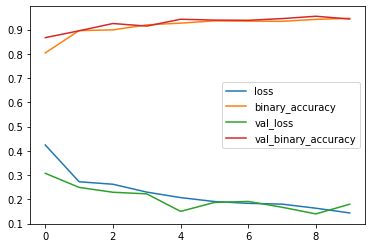

In [ ]:
loss_df.plot();

In [ ]:
model.evaluate(test_data)

36/36 [==============================] - 290s 8s/step - loss: 0.1061 - binary_accuracy: 0.9612


[0.10609594732522964, 0.9612334966659546]

In [ ]:
prediction = model.predict(test_data).flatten()
prediction = np.round(prediction) 
prediction

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [ ]:
y_test = test_data.classes

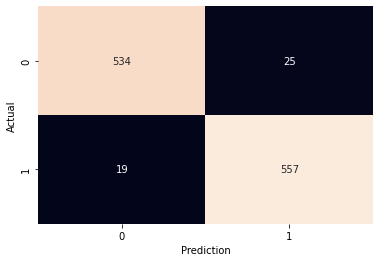

In [ ]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cbar=False,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Actual");

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       559
           1       0.96      0.97      0.96       576

    accuracy                           0.96      1135
   macro avg       0.96      0.96      0.96      1135
weighted avg       0.96      0.96      0.96      1135



## **Prediction**

In [ ]:
def mask_prediction(dataset_location):
  model = joblib.load('/content/drive/MyDrive/CMPE-257-project-Data/part-a-model.sav')
  test_data_gen = ImageDataGenerator(rescale=1/255)
  test_data = test_data_gen.flow_from_directory(dataset_location,
                             target_size=(200,200),
                             color_mode="rgb",
                             class_mode="binary",
                             batch_size=32,
                             seed=11,shuffle=False)
  prediction = model.predict(test_data).flatten()
  prediction = np.round(prediction)

  for i in range(len(test_data)):
    if prediction[i] == 1:
      img = test_data.filenames[i]
      print(img)
      print('no mask')
    else:
      img = test_data.filenames[i]
      print(img)
      print('has mask')

In [ ]:
mask_prediction("/content/drive/MyDrive/CMPE-257-project-Data/test")

In [ ]:
import cv2

def predict(img):
    model = joblib.load('/content/drive/MyDrive/CMPE-257-project-Data/part-a-model.sav')
    if type(img) == str:
        img = cv2.imread(img)
    img = cv2.resize(img,(200,200))
    img = img / 255
    if model.predict(np.array([img]))[0] > 0.5:
        predict = 0 # Mask Recognized
    else:
        predict = 1 # Mask not Recognized
    return predict

In [ ]:
predict('/content/with_mask_1.jpg')

0